In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [4]:
site = "E"

In [3]:
# load the data
data_directory = ""
data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158115 entries, 0 to 158114
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ts                             158115 non-null  object 
 1   instanceID                     158115 non-null  object 
 2   AoARel                         157719 non-null  float64
 3   bladePitch                     157854 non-null  float64
 4   bladePitchMax                  0 non-null       float64
 5   bladePitchMin                  0 non-null       float64
 6   bladePitchSetPoint             0 non-null       float64
 7   bladePitchStd                  0 non-null       float64
 8   cP                             157703 non-null  float64
 9   generatorTorque                0 non-null       float64
 10  rotorTorque                    155300 non-null  float64
 11  TI                             0 non-null       float64
 12  TSR                           

In [6]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158115 entries, 0 to 158114
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ts          158115 non-null  object
 1   instanceID  158115 non-null  object
 2   value       158115 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


In [8]:
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

3
['E_WTG01' 'E_WTG02' 'E_WTG03']


**Comment:** data size: 158115 x 26; flag size: 158115 x 3. There are 3 turbines. 366 x 3 x 24 x 6 + 3 = 158115. No missing rows.

In [11]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [12]:
# Add month and day
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [13]:
data.columns.values

array(['ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [14]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 'TI', 
                'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [15]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
100720,2020-08-21 03:30:00,8,21,3,E_WTG02,6.9,NaN,NaN,19.0,449.0,1
17967,2020-02-11 14:10:00,2,11,14,E_WTG01,15.4,NaN,NaN,13.3,2363.0,1
114960,2020-09-23 02:40:00,9,23,2,E_WTG01,7.4,NaN,NaN,13.0,524.0,1
17890,2020-02-11 09:50:00,2,11,9,E_WTG02,12.0,NaN,NaN,9.3,2028.0,1
68329,2020-06-07 04:00:00,6,7,4,E_WTG02,11.6,NaN,NaN,14.0,2084.0,1


### Plot time series

In [16]:
data_01 = data[data['instanceID'] == site + '_WTG01']

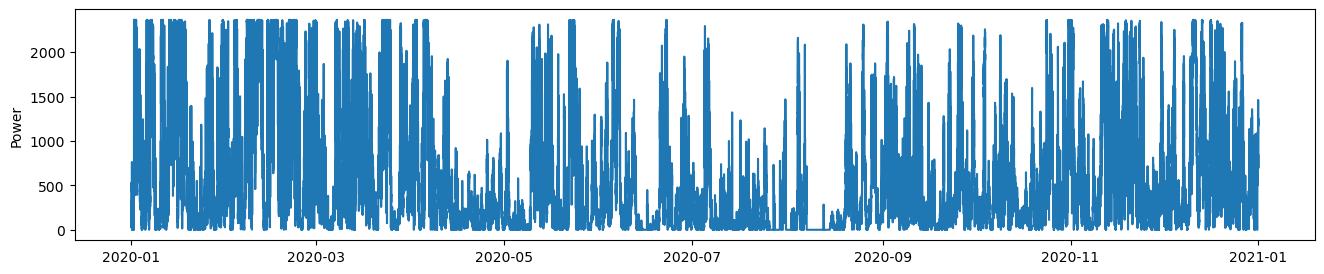

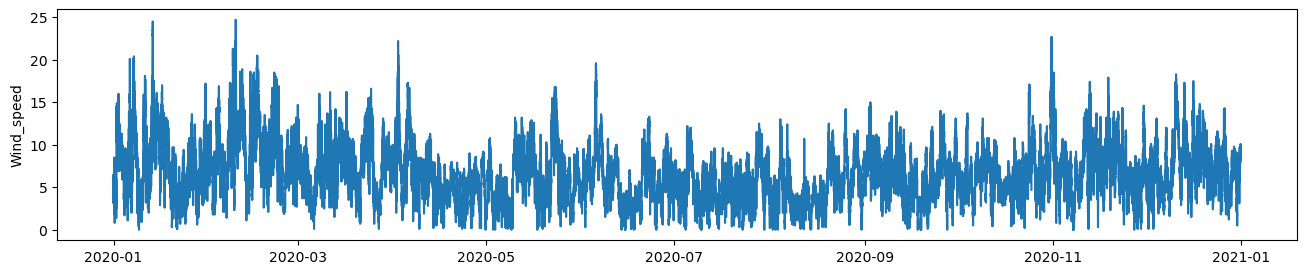

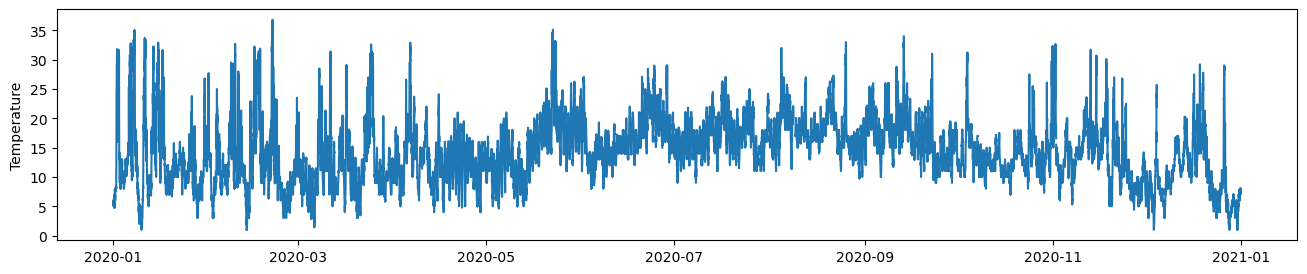

In [17]:
fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Power'])
ax.set_ylabel('Power')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Wind_speed'])
ax.set_ylabel('Wind_speed')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Temperature'])
ax.set_ylabel('Temperature')
plt.show()

### Full performance data

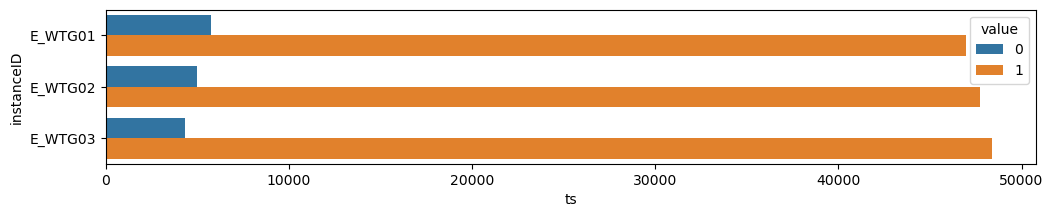

In [18]:
# Plot bar chart of performance flag for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
fig, ax = plt.subplots(figsize = (12,2))
ax = sns.barplot(x="ts", y="instanceID", hue = "value", data=bar, orient = "h")
plt.show()

In [19]:
# only select rows with flag value = 1
data_clean = data[data['value'] == 1]

# drop irrelevant columns 
data_clean = data_clean.drop(columns = ['value'])

In [20]:
data_clean.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power
count,143055.000000,143055.000000,143055.000000,143052.000000,0.0,0.0,142615.000000,143052.000000
mean,6.543378,15.786103,11.576722,7.042097,NaN,NaN,12.422693,645.119963
std,3.516853,8.852046,6.908968,3.109016,NaN,NaN,5.381072,685.967152
min,1.000000,1.000000,0.000000,1.300000,NaN,NaN,-2.100000,3.000000
25%,3.000000,8.000000,6.000000,4.700000,NaN,NaN,8.888889,129.000000
50%,7.000000,16.000000,12.000000,6.600000,NaN,NaN,12.000000,363.000000
75%,10.000000,23.000000,18.000000,8.900000,NaN,NaN,16.000000,931.000000
max,12.000000,31.000000,23.000000,25.700000,NaN,NaN,36.800000,2365.000000


In [21]:
# remove entries with null values
data_clean = data_clean[~data_clean['Temperature'].isnull()]
data_clean = data_clean[~data_clean['Wind_speed'].isnull()]

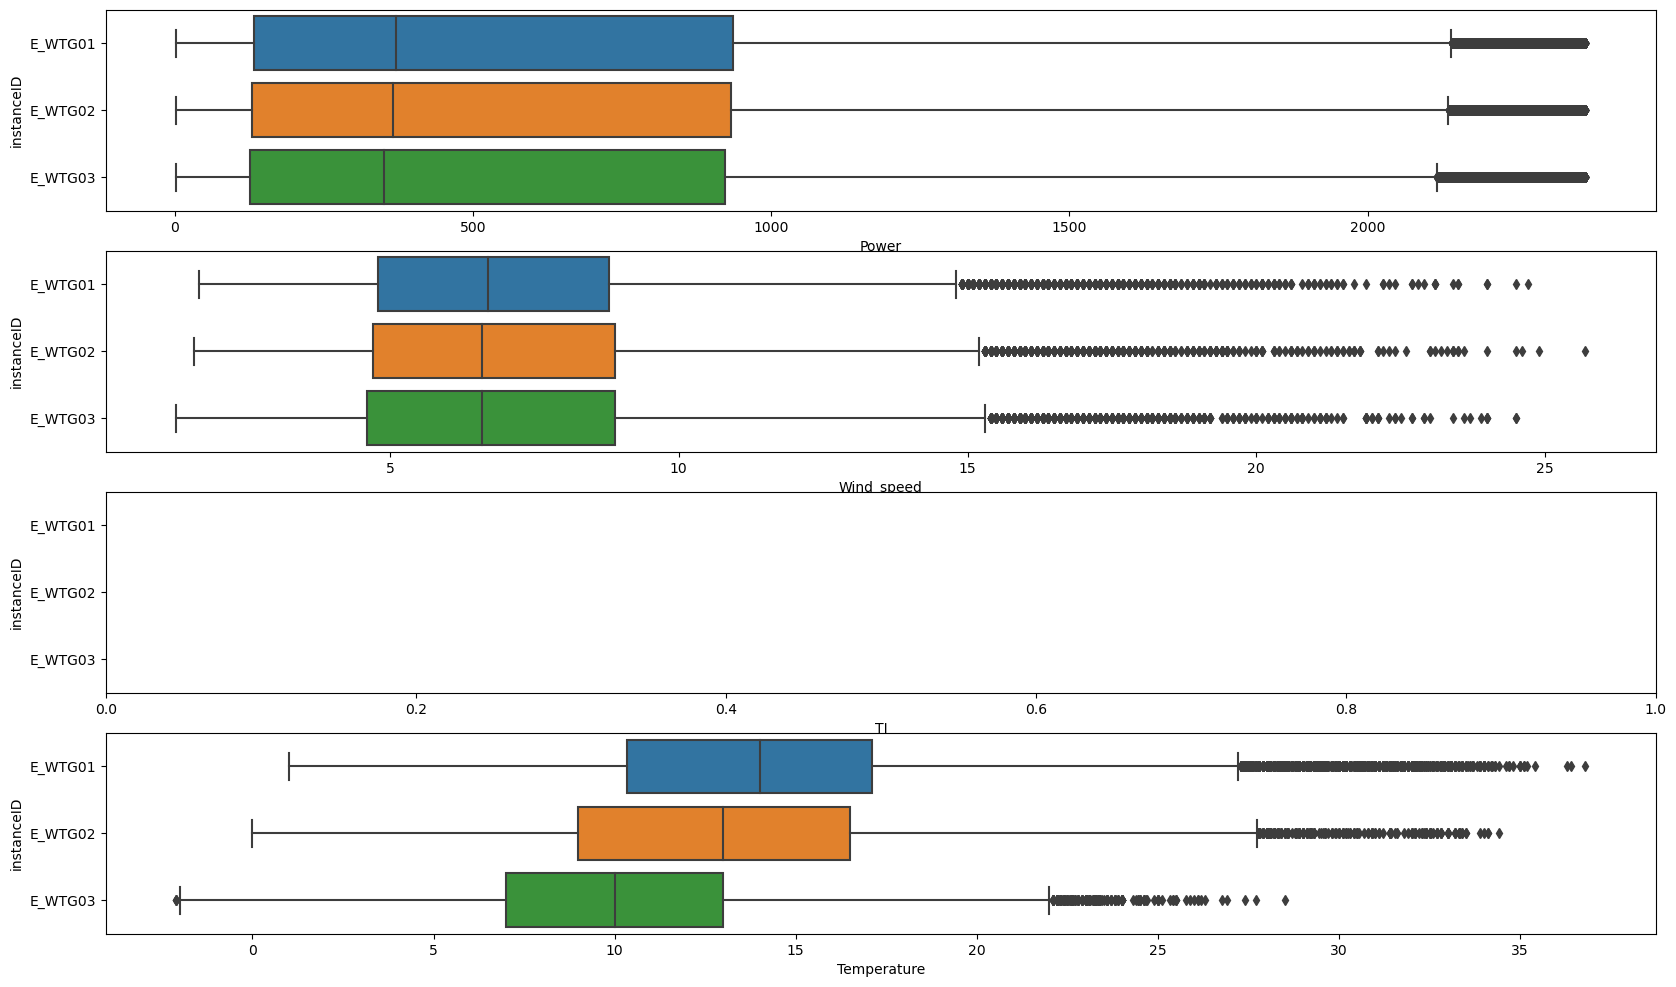

In [28]:
# Make boxplot
fig, ax = plt.subplots(4, figsize = (20,12))

features = [ 'Power','Wind_speed', 'TI', 'Temperature']

for i in range (0,4):
    sns.boxplot(x = features[i], y = 'instanceID', data = data_clean, orient = 'h', ax = ax[i])
    ax[i].set(xlabel = features[i], ylabel = 'instanceID')

plt.show()

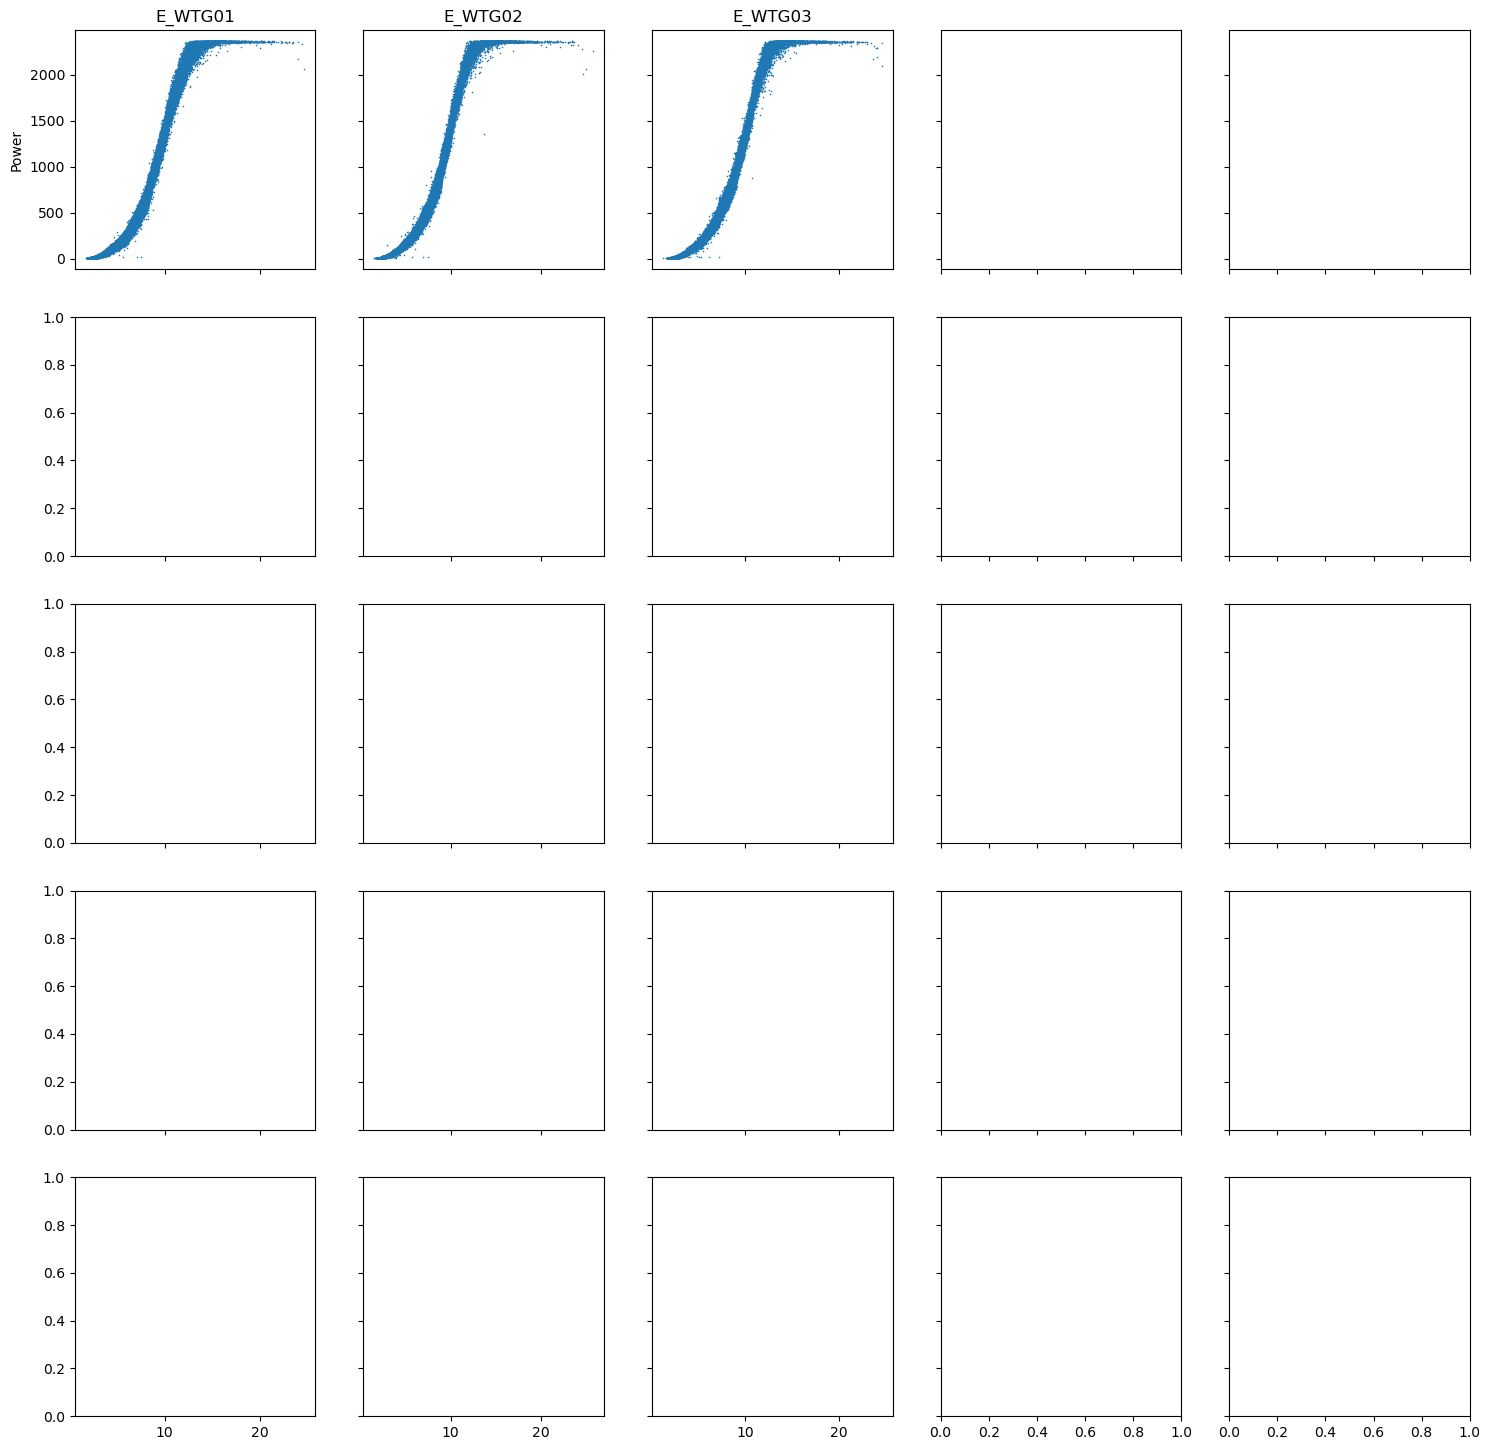

In [29]:
# Plot power curve for each turbine
fig, ax = plt.subplots(5,5, figsize=(18,18), sharex='col', sharey='row');

i = 0
for r in range (1):
        for c in range (5):
            data_turbine = data_clean[data_clean['instanceID'] == turbine_name[i]]
            sns.scatterplot(x = data_turbine['Wind_speed'], y = data_turbine['Power'], ax = ax[r][c], s = 1, edgecolor = None)
            ax[r][c].set_title(turbine_name[i])
            ax[r][c].set_xlabel("Wind_speed") 
            ax[r][c].set_ylabel("Power") 
            i += 1
            if i >= turbine_count:
                break
plt.show()

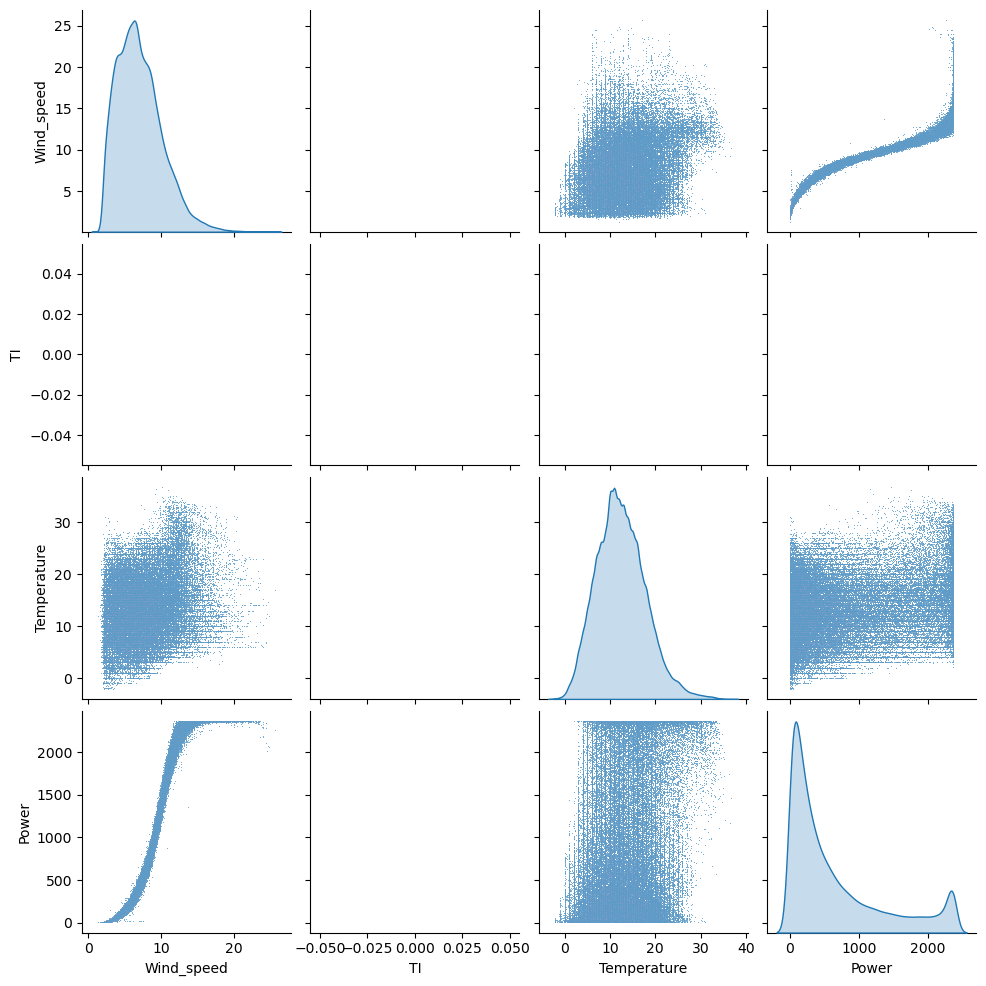

In [30]:
# Make pairplot
sns.pairplot(data_clean, vars = ["Wind_speed", "TI", "Temperature", "Power"], 
             diag_kind = 'kde', plot_kws={'s' : 0.5})
plt.show()

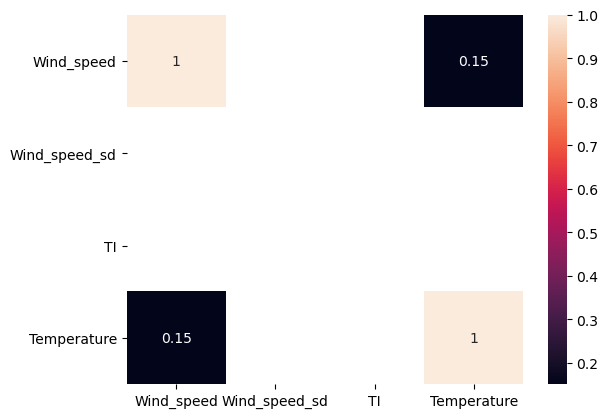

In [31]:
# Plot correlation between features
relation = ['Wind_speed', 'Wind_speed_sd', 'TI', 'Temperature']
sns.heatmap(data_clean[relation].corr(), annot=True)
plt.show()

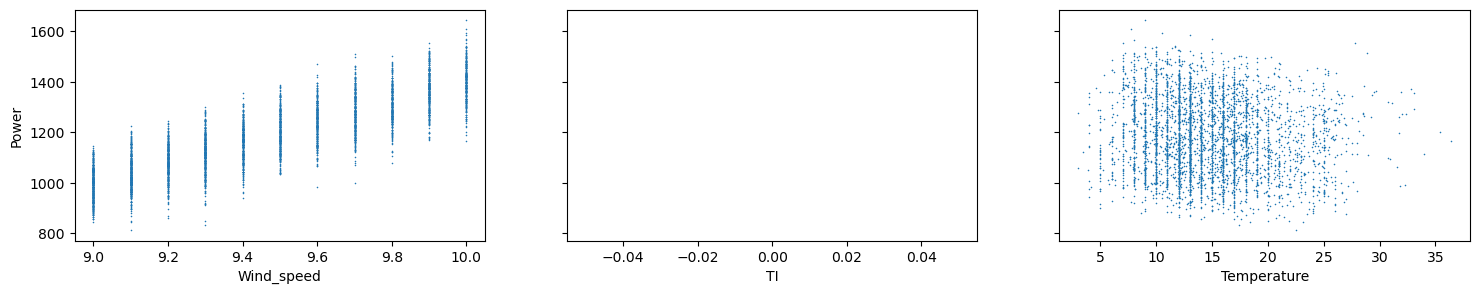

In [34]:
# Make plots for specific wind speed range
data_clean_01 = data_clean[(data_clean['instanceID'] == site + "_WTG01") & (data_clean['Wind_speed'] >= 9) 
                           & (data_clean['Wind_speed'] <= 10)] 

features = ["Wind_speed", "TI", "Temperature"]

fig, ax = plt.subplots(1,3, figsize=(18,3), sharey='row')

for c in range(3):
    sns.scatterplot(x = data_clean_01[features[c]], y = data_clean_01['Power'], ax = ax[c], s = 1, edgecolor = None)
    ax[c].set_xlabel(features[c]) 
    ax[c].set_ylabel("Power") 

plt.show()

### Export data

In [36]:
# data_clean.to_csv("")